# Project: Wrangle and Analyse Twitter's WeRateDogs 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling Process</a></li>
    <ul>
        <li><a href="#gathering">Gathering Data</a></li>
        <li><a href="#assessing">Assessing Data</a></li>
        <li><a href="#cleaning">Cleaning Data</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id="intro"></a>
## Introduction

In this project, the **Twitter's WeRateDogs** data is wrangled and analysed. 

First, the data is **gathered**. The data comes from three different sources: a pre-downloaded file, a file programmatically downloaded from the Internet, and querying Twitter's API.  

Then, the data will be **assessed** visually and programmatically to identify any tidiness and quality issues. Subsequently, the data is then **cleaned** to address these issues. 

Finally, using the cleaned data, the **data analysis** process can be carried out to gain interesting insights about Twitter's WeRateDogs. 

In [1]:
# Importing the main packages for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id="wrangling"></a>
## Data Wrangling Process

The data wrangling process consist of three steps: 
- **Gathering Data** 
- **Assessing Data**
- **Cleaning Data**.

In [2]:
# Importing the main packages for the data wrangling process

import requests
import tweepy
import json
import time

<a id="gathering"></a>
### Gathering Data

The data for this project comes from three different sources using three different methods. 

1. **WeRateDogs Twitter Archive**, obtained by **downloading it manually** on [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. **Tweet Image Predictions**, i.e., what breed of dog is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and will be **downloaded programmatically** using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

3. **Tweet Information**, including each tweet's retweet count, favourite ("like") count, and any additional interesting data. This is obtained by **querying Twitter's API**. 

#### 1. WeRateDogs archive

File `twitter-archive-enhanced.csv` is already downloaded manually. 

In [3]:
# create DF for WeRateDogs Twitter archive (file already downloaded manually)
df_dogs_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_dogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet Image Prediction from Udacity server

The file `image-predictions.tsv` is hosted on the Udacity server and can be downloaded programmatically using the `requests` library, then saved to file, and then DataFrame is created. 

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [4]:
# create DF for tweet image prediction
df_image_pred = pd.read_csv("image-predictions.tsv", sep="\t")
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Tweet information by querying Twitter API

A developer account is created and approved at Twitter. Then an app is created, where the keys and tokens can be obtained.

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library. This is then stored in a file. Interesting data is extracted and this is then read into a pandas DataFrame. 

***Note: the code below shows how to obtain data by querying Twitter API. The actual file used is "tweet_json.txt" provided by Udacity. This will be used for the analysis for the remainder of the project (and not the one queried from Twitter). This allows for consistency and reproducibility.***

In [6]:
# Consumer and access keys, tokens, and secrets from Twitter Developer App
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "" # Hidden
consumer_secret = ""
access_token = ""
access_secret = ""

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Twitter's has a 15 minute rate limit, and the query will take longer
# so API will continue 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# Each tweet's JSON data is written to its own line. 

count = 0
fails = {}
start = time.time()

with open("tweet_json_api_created.txt", "w") as outfile:
    for tweet in we_rate_dogs.tweet_id:
        count += 1
        try:
            tweet_api = api.get_status(tweet, tweet_mode='extended')
            #tweet_api returns a Status object. To access the JSON file, use ._json
            json.dump(tweet_api._json, outfile) 
            outfile.write("\n")
            print("Success - count {}: {}".format(count, tweet))
        # Skip deleted tweets
        except tweepy.TweepError as e:
            fails[tweet] = e
            print("Fail - count {}: {}".format(count, tweet))
            pass

end = time.time()
print(end - start)

Success - count 1: 892420643555336193
Success - count 2: 892177421306343426
Success - count 3: 891815181378084864
Success - count 4: 891689557279858688
Success - count 5: 891327558926688256
Success - count 6: 891087950875897856
Success - count 7: 890971913173991426
Success - count 8: 890729181411237888
Success - count 9: 890609185150312448
Success - count 10: 890240255349198849
Success - count 11: 890006608113172480
Success - count 12: 889880896479866881
Success - count 13: 889665388333682689
Success - count 14: 889638837579907072
Success - count 15: 889531135344209921
Success - count 16: 889278841981685760
Success - count 17: 888917238123831296
Success - count 18: 888804989199671297
Success - count 19: 888554962724278272
Fail - count 20: 888202515573088257
Success - count 21: 888078434458587136
Success - count 22: 887705289381826560
Success - count 23: 887517139158093824
Success - count 24: 887473957103951883
Success - count 25: 887343217045368832
Success - count 26: 88710139280408576

Rate limit reached. Sleeping for: 248


Success - count 111: 871102520638267392
Success - count 112: 871032628920680449
Success - count 113: 870804317367881728
Success - count 114: 870726314365509632
Success - count 115: 870656317836468226
Success - count 116: 870374049280663552
Success - count 117: 870308999962521604
Success - count 118: 870063196459192321
Fail - count 119: 869988702071779329
Success - count 120: 869772420881756160
Success - count 121: 869702957897576449
Success - count 122: 869596645499047938
Success - count 123: 869227993411051520
Success - count 124: 868880397819494401
Success - count 125: 868639477480148993
Success - count 126: 868622495443632128
Success - count 127: 868552278524837888
Success - count 128: 867900495410671616
Success - count 129: 867774946302451713
Success - count 130: 867421006826221569
Success - count 131: 867072653475098625
Success - count 132: 867051520902168576
Fail - count 133: 866816280283807744
Success - count 134: 866720684873056260
Success - count 135: 866686824827068416
Succes

Success - count 317: 834931633769889797
Success - count 318: 834786237630337024
Success - count 319: 834574053763584002
Success - count 320: 834477809192075265
Success - count 321: 834458053273591808
Success - count 322: 834209720923721728
Success - count 323: 834167344700198914
Success - count 324: 834089966724603904
Success - count 325: 834086379323871233
Success - count 326: 833863086058651648
Success - count 327: 833826103416520705
Success - count 328: 833732339549220864
Success - count 329: 833722901757046785
Success - count 330: 833479644947025920
Success - count 331: 833124694597443584
Success - count 332: 832998151111966721
Success - count 333: 832769181346996225
Success - count 334: 832757312314028032
Success - count 335: 832682457690300417
Success - count 336: 832645525019123713
Success - count 337: 832636094638288896
Success - count 338: 832397543355072512
Success - count 339: 832369877331693569
Success - count 340: 832273440279240704
Success - count 341: 832215909146226688


Success - count 523: 809808892968534016
Success - count 524: 809448704142938112
Success - count 525: 809220051211603969
Success - count 526: 809084759137812480
Success - count 527: 808838249661788160
Success - count 528: 808733504066486276
Success - count 529: 808501579447930884
Success - count 530: 808344865868283904
Success - count 531: 808134635716833280
Success - count 532: 808106460588765185
Success - count 533: 808001312164028416
Success - count 534: 807621403335917568
Success - count 535: 807106840509214720
Success - count 536: 807059379405148160
Success - count 537: 807010152071229440
Success - count 538: 806629075125202948
Success - count 539: 806620845233815552
Success - count 540: 806576416489959424
Success - count 541: 806542213899489280
Success - count 542: 806242860592926720
Success - count 543: 806219024703037440
Success - count 544: 805958939288408065
Success - count 545: 805932879469572096
Success - count 546: 805826884734976000
Success - count 547: 805823200554876929


Success - count 728: 782305867769217024
Success - count 729: 782021823840026624
Success - count 730: 781955203444699136
Success - count 731: 781661882474196992
Success - count 732: 781655249211752448
Success - count 733: 781524693396357120
Success - count 734: 781308096455073793
Success - count 735: 781251288990355457
Success - count 736: 781163403222056960
Success - count 737: 780931614150983680
Success - count 738: 780858289093574656
Success - count 739: 780800785462489090
Success - count 740: 780601303617732608
Success - count 741: 780543529827336192
Success - count 742: 780496263422808064
Success - count 743: 780476555013349377
Success - count 744: 780459368902959104
Success - count 745: 780192070812196864
Success - count 746: 780092040432480260
Success - count 747: 780074436359819264
Success - count 748: 779834332596887552
Success - count 749: 779377524342161408
Success - count 750: 779124354206535695
Success - count 751: 779123168116150273
Success - count 752: 779056095788752897


Fail - count 933: 754011816964026368
Success - count 934: 753655901052166144
Success - count 935: 753420520834629632
Success - count 936: 753398408988139520
Success - count 937: 753375668877008896
Success - count 938: 753298634498793472
Success - count 939: 753294487569522689
Success - count 940: 753039830821511168
Success - count 941: 753026973505581056
Success - count 942: 752932432744185856
Success - count 943: 752917284578922496
Success - count 944: 752701944171524096
Success - count 945: 752682090207055872
Success - count 946: 752660715232722944
Success - count 947: 752568224206688256
Success - count 948: 752519690950500352
Success - count 949: 752334515931054080
Success - count 950: 752309394570878976
Success - count 951: 752173152931807232
Success - count 952: 751950017322246144
Success - count 953: 751937170840121344
Success - count 954: 751830394383790080
Success - count 955: 751793661361422336
Success - count 956: 751598357617971201
Success - count 957: 751583847268179968
Suc

Rate limit reached. Sleeping for: 258


Success - count 1011: 747461612269887489
Success - count 1012: 747439450712596480
Success - count 1013: 747242308580548608
Success - count 1014: 747219827526344708
Success - count 1015: 747204161125646336
Success - count 1016: 747103485104099331
Success - count 1017: 746906459439529985
Success - count 1018: 746872823977771008
Success - count 1019: 746818907684614144
Success - count 1020: 746790600704425984
Success - count 1021: 746757706116112384
Success - count 1022: 746726898085036033
Success - count 1023: 746542875601690625
Success - count 1024: 746521445350707200
Success - count 1025: 746507379341139972
Success - count 1026: 746369468511756288
Success - count 1027: 746131877086527488
Success - count 1028: 746056683365994496
Success - count 1029: 745789745784041472
Success - count 1030: 745712589599014916
Success - count 1031: 745433870967832576
Success - count 1032: 745422732645535745
Success - count 1033: 745314880350101504
Success - count 1034: 745074613265149952
Success - count 

Success - count 1211: 715680795826982913
Success - count 1212: 715360349751484417
Success - count 1213: 715342466308784130
Success - count 1214: 715220193576927233
Success - count 1215: 715200624753819648
Success - count 1216: 715009755312439296
Success - count 1217: 714982300363173890
Success - count 1218: 714962719905021952
Success - count 1219: 714957620017307648
Success - count 1220: 714631576617938945
Success - count 1221: 714606013974974464
Success - count 1222: 714485234495041536
Success - count 1223: 714258258790387713
Success - count 1224: 714251586676113411
Success - count 1225: 714214115368108032
Success - count 1226: 714141408463036416
Success - count 1227: 713919462244790272
Success - count 1228: 713909862279876608
Success - count 1229: 713900603437621249
Success - count 1230: 713761197720473600
Success - count 1231: 713411074226274305
Success - count 1232: 713177543487135744
Success - count 1233: 713175907180089344
Success - count 1234: 712809025985978368
Success - count 

Success - count 1411: 699036661657767936
Success - count 1412: 698989035503689728
Success - count 1413: 698953797952008193
Success - count 1414: 698907974262222848
Success - count 1415: 698710712454139905
Success - count 1416: 698703483621523456
Success - count 1417: 698635131305795584
Success - count 1418: 698549713696649216
Success - count 1419: 698355670425473025
Success - count 1420: 698342080612007937
Success - count 1421: 698262614669991936
Success - count 1422: 698195409219559425
Success - count 1423: 698178924120031232
Success - count 1424: 697995514407682048
Success - count 1425: 697990423684476929
Success - count 1426: 697943111201378304
Success - count 1427: 697881462549430272
Success - count 1428: 697630435728322560
Success - count 1429: 697616773278015490
Success - count 1430: 697596423848730625
Success - count 1431: 697575480820686848
Success - count 1432: 697516214579523584
Success - count 1433: 697482927769255936
Success - count 1434: 697463031882764288
Success - count 

Success - count 1611: 685532292383666176
Success - count 1612: 685325112850124800
Success - count 1613: 685321586178670592
Success - count 1614: 685315239903100929
Success - count 1615: 685307451701334016
Success - count 1616: 685268753634967552
Success - count 1617: 685198997565345792
Success - count 1618: 685169283572338688
Success - count 1619: 684969860808454144
Success - count 1620: 684959798585110529
Success - count 1621: 684940049151070208
Success - count 1622: 684926975086034944
Success - count 1623: 684914660081053696
Success - count 1624: 684902183876321280
Success - count 1625: 684880619965411328
Success - count 1626: 684830982659280897
Success - count 1627: 684800227459624960
Success - count 1628: 684594889858887680
Success - count 1629: 684588130326986752
Success - count 1630: 684567543613382656
Success - count 1631: 684538444857667585
Success - count 1632: 684481074559381504
Success - count 1633: 684460069371654144
Success - count 1634: 684241637099323392
Success - count 

Success - count 1811: 676821958043033607
Success - count 1812: 676819651066732545
Success - count 1813: 676811746707918848
Success - count 1814: 676776431406465024
Success - count 1815: 676617503762681856
Success - count 1816: 676613908052996102
Success - count 1817: 676606785097199616
Success - count 1818: 676603393314578432
Success - count 1819: 676593408224403456
Success - count 1820: 676590572941893632
Success - count 1821: 676588346097852417
Success - count 1822: 676582956622721024
Success - count 1823: 676575501977128964
Success - count 1824: 676533798876651520
Success - count 1825: 676496375194980353
Success - count 1826: 676470639084101634
Success - count 1827: 676440007570247681
Success - count 1828: 676430933382295552
Success - count 1829: 676263575653122048
Success - count 1830: 676237365392908289
Success - count 1831: 676219687039057920
Success - count 1832: 676215927814406144
Success - count 1833: 676191832485810177
Success - count 1834: 676146341966438401
Success - count 

Rate limit reached. Sleeping for: 262


Success - count 1911: 674416750885273600
Success - count 1912: 674410619106390016
Success - count 1913: 674394782723014656
Success - count 1914: 674372068062928900
Success - count 1915: 674330906434379776
Success - count 1916: 674318007229923329
Success - count 1917: 674307341513269249
Success - count 1918: 674291837063053312
Success - count 1919: 674271431610523648
Success - count 1920: 674269164442398721
Success - count 1921: 674265582246694913
Success - count 1922: 674262580978937856
Success - count 1923: 674255168825880576
Success - count 1924: 674082852460433408
Success - count 1925: 674075285688614912
Success - count 1926: 674063288070742018
Success - count 1927: 674053186244734976
Success - count 1928: 674051556661161984
Success - count 1929: 674045139690631169
Success - count 1930: 674042553264685056
Success - count 1931: 674038233588723717
Success - count 1932: 674036086168010753
Success - count 1933: 674024893172875264
Success - count 1934: 674019345211760640
Success - count 

Success - count 2111: 670444955656130560
Success - count 2112: 670442337873600512
Success - count 2113: 670435821946826752
Success - count 2114: 670434127938719744
Success - count 2115: 670433248821026816
Success - count 2116: 670428280563085312
Success - count 2117: 670427002554466305
Success - count 2118: 670421925039075328
Success - count 2119: 670420569653809152
Success - count 2120: 670417414769758208
Success - count 2121: 670411370698022913
Success - count 2122: 670408998013820928
Success - count 2123: 670403879788544000
Success - count 2124: 670385711116361728
Success - count 2125: 670374371102445568
Success - count 2126: 670361874861563904
Success - count 2127: 670338931251150849
Success - count 2128: 670319130621435904
Success - count 2129: 670303360680108032
Success - count 2130: 670290420111441920
Success - count 2131: 670093938074779648
Success - count 2132: 670086499208155136
Success - count 2133: 670079681849372674
Success - count 2134: 670073503555706880
Success - count 

Success - count 2311: 666786068205871104
Success - count 2312: 666781792255496192
Success - count 2313: 666776908487630848
Success - count 2314: 666739327293083650
Success - count 2315: 666701168228331520
Success - count 2316: 666691418707132416
Success - count 2317: 666649482315059201
Success - count 2318: 666644823164719104
Success - count 2319: 666454714377183233
Success - count 2320: 666447344410484738
Success - count 2321: 666437273139982337
Success - count 2322: 666435652385423360
Success - count 2323: 666430724426358785
Success - count 2324: 666428276349472768
Success - count 2325: 666421158376562688
Success - count 2326: 666418789513326592
Success - count 2327: 666411507551481857
Success - count 2328: 666407126856765440
Success - count 2329: 666396247373291520
Success - count 2330: 666373753744588802
Success - count 2331: 666362758909284353
Success - count 2332: 666353288456101888
Success - count 2333: 666345417576210432
Success - count 2334: 666337882303524864
Success - count 

***Note: for consistency and reproducibility, the remainder of the project will use "tweet_json.txt" provided by Udacity, and not the one queried from Twitter API above.***

In [5]:
# tweet_json.txt file is read tweet by tweet to extract interesting information:
# tweet ID, retweet count, and favorite count. Add these into a list
df_list = []

with open("tweet_json.txt") as json_file:
    for line in json_file: 
        tweet = json.loads(line)
        tweet_id = tweet["id"]
        retweet_count = tweet["retweet_count"]
        favorite_count = tweet["favorite_count"]
        df_list.append({"tweet_id": tweet_id,
                        "retweet_count": retweet_count,
                        "favorite_count": favorite_count})

In [6]:
df_tweets = pd.DataFrame(df_list, columns=["tweet_id", "retweet_count", 
                                           "favorite_count"])
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id="assessing"></a>
### Assessing Data

Assessing data reveals issues that can be categorised into two main types:
- **Quality issues**: due to the data's content. This is also known as dirty data or low quality data
- **Tidiness issues**: due to the data's structure. This is also known as untidy data

There are two ways to identify such issues: **visual** and **programmatic assessments**. 

The following data quality dimensions will help guide through assessing and cleaning data:

- **Completeness** - is the data complete?
- **Validity** - are all records valid and confrom to a defined schema?
- **Accuracy** - is all the data accurate even if they are valid?
- **Consistency** - do similar data within and across tables have a consistent format?

The data quality and tidiness issues will be summarised at the end of this section. 

***Dataset 1: WeRateDogs archive `df_dogs_archive`***

Column descriptions:
- `tweet_id`: last part of the tweet URL after "status/", e.g. https://twitter.com/dog_rates/status/889531135344209921

`doggo`, `pupper`, `floofer`, and `puppo` refers to the different dog stages. (via #WeRateDogs book on Amazon)
- `doggo`: a big pupper, usually older. May behave like a pupper, and is a pupper that has its life in order.
- `pupper`: a small doggo, usually younger. Can be equally, or even more mature than doggo. A doggo that is inexperienced and unprepared for responsibilities.
- `puppo`: transitional phase between a pupper and doggo. It is the equivalent of a teenager
- `floofer`: any dog really, but commonly used for dogs with excessive hair. 

In [7]:
df_dogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_dogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_dogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
pd.set_option('display.max_colwidth', -1)
df_dogs_archive[["text", "rating_numerator", "rating_denominator", "name"]].sample(10)

,text,rating_numerator,rating_denominator,name
2210,Say hello to Kallie. There was a tornado in the area &amp; the news guy said everyone should wear a helmet. 10/10 adorbz https://t.co/AGyogHtmXx,10,10,Kallie
1172,This is Ralphé. He patrols the lake. Looking for babes. 11/10 https://t.co/Pb6iMmo0wk,11,10,Ralphé
2284,*takes several long deep breaths* omg omg oMG OMG OMG OMGSJYBSNDUYWJO 12/10 https://t.co/QCugm5ydl6,12,10,None
1219,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10,Benedict
1955,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,10,10,a
555,RT @dog_rates: I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,13,10,None
457,This is Autumn. Her favorite toy is a cheeseburger. She takes it everywhere. 11/10 https://t.co/JlPug12E5Z,11,10,Autumn
1136,"This is Enchilada (yes, that's her real name). She's a Low-Cruisin Plopflopple. Very rare. Only a few left. 12/10 https://t.co/SiaiTWgsfP",12,10,Enchilada
15,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,13,10,Oliver
1263,This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV,11,10,None


***Dataset 2: Image Prediction `df_image_pred`***

Column descriptions:
- `tweet_id`: last part of the tweet URL after "status/"
- `img_num`: image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- `p1`: algorithm's #1 prediction for the image in the tweet
- `p1_conf`: how confident the algorithm is in its #1 prediction
- `p1_dog`: whether or not the #1 prediction is a breed of dog
- `p2` and `p3` equivalents are the algorithm's second and third most likely prediction, respectively

In [20]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


***Dataset 3: Tweets Information `df_tweets`***

In [23]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Below are the data quality and tidiness issues that can be identified after assessing the data.

#### Data Tidiness Issues

-  As all three dataframes contain information about one observational unit (tweets about dogs), combine `df_dogs_archive`, `df_image_pred`, and `df_tweets` dataframes together to create on master dataset, called `df_dogs_master`. 
- `doggo`, `pupper`, `puppo`, and `floofer` columns from the new DF `df_dogs_tweets` DF can be combined into one new column indicating the stage of the dog, and another column for multiple stages. Then, the original columns will be removed from DF.

#### Data Quality issues

*Data quality issues in the master DF: `df_dogs_master`*

- Non-null values for `in_reply_to_status_id` and `in_reply_to_user_id`, as well as `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are replies or retweets of original tweets. Only the original tweets are of interest.
- As only original tweets are considered, the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,  `retweeted_user_id`, and `retweeted_status_timestamp`, will be removed from the DF. 
- Incorrect data format: `timestamp` -> change to a datetime object
- `rating_numerator` and `rating_denominator` contain incorrectly extracted ratings. 
- `rating_denominator` also contain values that are not equal to 10.
- In the `name` column, the variable "None" is assigned where there is no name in the tweet. 
- `name` of dogs are automatically extracted after "This is", but some return inaccurate results. In particular, lower case words such as "quite" or "a" are common. 
- There are missing images for a few tweets, visible in null-values in `expanded_urls`.

<a id="cleaning"></a>
### Cleaning Data

First, create copies of the DataFrames to keep the original data.

In [26]:
df_dogs_archive_copy = df_dogs_archive.copy()
df_image_pred_copy = df_image_pred.copy()
df_tweets_copy = df_tweets.copy()

# Display full numbers
pd.set_option('display.float_format', '{:.2f}'.format)

#### Cleaning Tidiness Issues

1. As all three dataframes contain information about one observational unit (tweets about dogs), combine `df_dogs_archive`, `df_image_pred`, and `df_tweets` dataframes together to create on master dataset, called `df_dogs_master`, using the merge function.
2. `doggo`, `pupper`, `puppo`, and `floofer` columns from the new DF `df_dogs_master_copy` DF can be combined into one new column indicating the stage of the dog, and another column for multiple stages. Then, the original columns will be removed from DF.

##### Tidiness Issue 1

As all three dataframes contain information about one observational unit (tweets about dogs), combine `df_dogs_archive`, `df_image_pred`, and `df_tweets` dataframes together to create on master dataset, called `df_dogs_master`, using the merge function. 

In [27]:
# First, merge the df_dogs_archive and df_tweets DF 
df_dogs_master = df_dogs_archive_copy.merge(df_tweets, how="outer", left_on="tweet_id", 
                                            right_on="tweet_id")

In [28]:
df_dogs_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853.00,39467.00
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514.00,33819.00
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328.00,25461.00
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964.00,42908.00
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774.00,41048.00


In [29]:
# Now, merge the df_image_pred and df_dogs_master DF 
df_dogs_master = df_dogs_master.merge(df_image_pred, how="outer", left_on="tweet_id",
                                     right_on="tweet_id")

In [30]:
# Checking that the two new columns are added
df_dogs_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [34]:
# Checking that the number of observations are consistent
# New DF should have at least the same number of observations as the DF with highest number of observations
len(df_dogs_master), len(df_dogs_archive_copy), len(df_tweets_copy), len(df_image_pred_copy)

(2356, 2356, 2354, 2075)

In [82]:
# Create copy of newly created DF
df_dogs_master_copy = df_dogs_master.copy()

##### Tidiness Issue 2 

- `doggo`, `pupper`, `puppo`, and `floofer` columns from the new DF `df_dogs_master_copy` DF can be combined into one new column indicating the stage of the dog, and another column for multiple stages. Then, the original columns will be removed from DF.

First, a new column `dog_stage` is created. The observations with only **one** dog stage is added to this column.

In [83]:
df_dogs_master_copy[["text", "doggo", "pupper", "puppo", "floofer"]].sample(10)

,text,doggo,pupper,puppo,floofer
1968,This is Frankie. He's wearing blush. 11/10 really accents the cheek bones https://t.co/iJABMhVidf,None,None,None,None
954,This is Fred. He's having one heck of a summer. 11/10 https://t.co/I7SFchkNk4,None,None,None,None
1175,This is Neptune. He's a Snowy Swiss Mountain Floofapolis. Cheeky wink. Tongue nifty af. 11/10 would pet so firmly https://t.co/SoZq2Xoopv,None,None,None,None
447,RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,doggo,None,None,None
139,This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc,None,None,None,None
1902,When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp,None,None,None,None
50,This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t.co/Nx52PGwH94,None,None,None,None
1890,This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD,None,None,None,None
686,RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,None,None,None,None
1955,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,None,None,None,None


In [84]:
# To make the analysis easier, convert all "None" values to NaN
col_stage = ["doggo", "floofer", "pupper", "puppo"]
for col in col_stage:
    df_dogs_master_copy[col] = df_dogs_master_copy[col].replace("None", np.nan)
    df_dogs_master_copy[col] = df_dogs_master_copy[col].notnull().astype(bool)

In [85]:
df_dogs_master_copy[["text", "doggo", "floofer", "pupper", "puppo"]].head()

,text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,False,False,False
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,False,False,False
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,False,False,False
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,False,False,False
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",False,False,False,False


In [86]:
# Find index which corresponds to the dog stage
doggo_idx = df_dogs_master_copy[df_dogs_master_copy["doggo"] == True].index
floofer_idx = df_dogs_master_copy[df_dogs_master_copy["floofer"] == True].index
pupper_idx = df_dogs_master_copy[df_dogs_master_copy["pupper"] == True].index
puppo_idx = df_dogs_master_copy[df_dogs_master_copy["puppo"] == True].index

Below, we will iterate through the index in the `dog_stage` column and insert the appropriate dog stage. There are duplicated index which contain more than one stage of dogs. These will be removed from the index list above. The duplicated dog stages will then be dealt with manually afterwards. 

In [87]:
# Find duplicated index and add to a list
duplicated_ls = []

duplicated_ls.append(list(set(doggo_idx) & set(floofer_idx)))
duplicated_ls.append(list(set(doggo_idx) & set(pupper_idx)))
duplicated_ls.append(list(set(doggo_idx) & set(puppo_idx)))
duplicated_ls.append(list(set(floofer_idx) & set(pupper_idx)))
duplicated_ls.append(list(set(floofer_idx) & set(puppo_idx)))
duplicated_ls.append(list(set(pupper_idx) & set(puppo_idx)))

duplicated_ls

[[200],
 [705, 1063, 778, 460, 531, 565, 822, 1113, 956, 733, 889, 575],
 [191],
 [],
 [],
 []]

In [88]:
# Convert lists within a list to a simple list using list comprehension
duplicated = [x for sub_list in duplicated_ls for x in sub_list]
duplicated.sort()
duplicated

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [89]:
# Duplicated dog stages
df_dogs_master_copy.loc[duplicated, ["text", "doggo", "floofer", "pupper", "puppo"]]

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,True,False,False,True
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",True,True,False,False
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",True,False,True,False
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,True,False,True,False
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",True,False,True,False
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,True,False,True,False
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,True,False,True,False
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",True,False,True,False
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",True,False,True,False
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,True,False,True,False


In [90]:
# Remove the index where multiple dog stage exists
doggo_idx_rm = [idx for idx in doggo_idx if not idx in duplicated]
floofer_idx_rm = [idx for idx in floofer_idx if not idx in duplicated]
pupper_idx_rm = [idx for idx in pupper_idx if not idx in duplicated]
puppo_idx_rm = [idx for idx in puppo_idx if not idx in duplicated]

In [91]:
# Check that duplicates has been removed 
floofer_idx

Int64Index([46, 200, 582, 774, 984, 1022, 1091, 1110, 1534, 1614], dtype='int64')

In [92]:
# index 200 is expected to have been removed as they appear in duplicates and floofer_idx
floofer_idx_rm

[46, 582, 774, 984, 1022, 1091, 1110, 1534, 1614]

In [93]:
# Create new column "dog_stage" in the DF
df_dogs_master_copy["dog_stage"] = np.nan

In [94]:
# Iterate through each dog stages using non-duplicated index (doggo_idx_rm, etc.)
# and add the corresponding variable name to new column dog_stage
for d in doggo_idx_rm:
    df_dogs_master_copy.loc[d, "dog_stage"] = "doggo"

for f in floofer_idx_rm:
    df_dogs_master_copy.loc[f, "dog_stage"] = "floofer"
    
for pr in pupper_idx_rm:
    df_dogs_master_copy.loc[pr, "dog_stage"] = "pupper"
    
for po in puppo_idx_rm:
    df_dogs_master_copy.loc[po, "dog_stage"] = "puppo"

In [95]:
df_dogs_master_copy["dog_stage"].value_counts()

pupper     245
doggo      83 
puppo      29 
floofer    9  
Name: dog_stage, dtype: int64

In [96]:
# For example, check that for floofer_idx_rm, the dog_stage has been correctly assigned
print(floofer_idx_rm)
for f in floofer_idx_rm:
    print(df_dogs_master_copy.loc[f, "dog_stage"])

[46, 582, 774, 984, 1022, 1091, 1110, 1534, 1614]
floofer
floofer
floofer
floofer
floofer
floofer
floofer
floofer
floofer


Now, **multiple** stages of dogs will be dealt with. The dogs containing multiple stages will be added to a new column `multiple_dog_stage`. 

In [97]:
# Observations with multiple dog stages
df_dogs_master_copy.loc[duplicated, ["text", "doggo", "floofer", "pupper", "puppo"]]

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,True,False,False,True
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",True,True,False,False
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",True,False,True,False
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,True,False,True,False
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",True,False,True,False
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,True,False,True,False
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,True,False,True,False
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",True,False,True,False
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",True,False,True,False
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,True,False,True,False


In [98]:
# Create new column for multiple dog stage
df_dogs_master_copy["multiple_dog_stage"] = np.nan

In [99]:
# Iterate through duplicated indices, and each stage. If True, the dog string will record that
stage_ls = ["doggo", "floofer", "pupper", "puppo"]

for dupl in duplicated:
    dog_str = ""
    for stage in stage_ls:
        if df_dogs_master_copy.loc[dupl, stage] == True:
            dog_str = dog_str + " " + stage
    df_dogs_master_copy.loc[dupl, "multiple_dog_stage"] = dog_str

In [100]:
# Check that the columns contain the correct information for multiple_dog_stage
df_dogs_master_copy.loc[duplicated, ["text", "dog_stage", "multiple_dog_stage"]]

,text,dog_stage,multiple_dog_stage
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,doggo puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,doggo floofer
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,doggo pupper
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,doggo pupper
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,doggo pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,doggo pupper
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,doggo pupper
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,doggo pupper
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo pupper
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,doggo pupper


In [109]:
# Check that the number of observations in duplicated indices equal that of dog stages
len(duplicated), sum(df_dogs_master_copy["multiple_dog_stage"].notnull())

(14, 14)

Finally, the columns `doggo`, `pupper`, `puppo`, and `floofer` are no longer needed and thus, removed from DF.

In [111]:
df_dogs_master_copy.drop(["doggo", "pupper", "puppo", "floofer"], axis=1, inplace=True)

In [117]:
# Check that the columns are now removed
df_dogs_master_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'multiple_dog_stage'],
      dtype='object')

#### Data Quality issues

*Data quality issues in the master DF: `df_dogs_master`*

1. Non-null values for `in_reply_to_status_id` and `in_reply_to_user_id`, as well as `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are replies or retweets of original tweets. Only the original tweets are of interest. Observations with non-null values for those columns will be removed from DF using Boolean masks. 
2. As only original tweets are considered, the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,  `retweeted_user_id`, and `retweeted_status_timestamp`, will be removed from the DF using the drop function. 
3. Incorrect data format: `timestamp` -> change to a datetime object
4. `rating_numerator` and `rating_denominator` contain incorrectly extracted ratings. Rating is automatically extracted when the first slash is seen. The correct ratings will be manually extracted as there are few of them and there is no obvious pattern to do so programmatically. 
5. `rating_denominator` also contain values that are not equal to 10. For these ratings, they will be normalised to have a denominator of 10 and the `rating_numerator` will be normalised accordingly.
6. In the `name` column, the variable "None" is assigned where there is no name in the tweet. Instead, these "None" values will be replaced by NaN values using the replace function.
7. `name` of dogs are automatically extracted after "This is", but some return inaccurate results. In particular, lower case words such as "quite" or "a" are common. Again, no obvious pattern can be seen - some tweets contain real names so these are modified manually. The remaining lower case and inaccurate results are converted to NaN values. 
8. There are missing images for a few tweets, visible in null-values in `expanded_urls`. These observations will be removed. 

##### Quality Issue 1

Non-null values for `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`, as well as `in_reply_to_status_id` and `in_reply_to_user_id`,  are retweets and replies of original tweets. Only the original tweets are of interest. Observations with non-null values for those columns will be removed from DF using Boolean masks.

First, the retweets observations in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` will be removed.

In [118]:
# total observations
len(df_dogs_master_copy)

2356

In [119]:
# non-null retweeted_status_id values to be removed 
sum(df_dogs_master_copy.retweeted_status_id.notnull())

181

In [120]:
# Boolean mask to remove observations with a retweeted_status_id
df_dogs_master_copy = df_dogs_master_copy[df_dogs_master_copy.retweeted_status_id.isnull()]

In [121]:
# Should return 2356-181=2175 observations
len(df_dogs_master_copy)

2175

In [122]:
# Should return 0 
sum(df_dogs_master_copy.retweeted_status_id.notnull())

0

Secondly, non-null `in_reply_to_status_id` and `in_reply_to_user_id` will be removed from DF.

In [123]:
# Non-null values
df_dogs_master_copy[df_dogs_master_copy.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
30,886267009285017600,886266357075128320.00,2281181600.00,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,nan,nan,NaN,NaN,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
55,881633300179243008,881607037314052096.00,47384430.00,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,nan,nan,NaN,NaN,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
64,879674319642796034,879553827334172672.00,3105440746.00,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,nan,nan,NaN,NaN,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
113,870726314365509632,870726202742493184.00,16487760.00,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,nan,nan,NaN,NaN,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
148,863427515083354112,863425645568774144.00,77596200.00,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",nan,nan,NaN,NaN,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN


In [124]:
# Total non-null columns for in_reply_to_status_id and in_reply_to_user_id
sum(df_dogs_master_copy.in_reply_to_status_id.notnull()), sum(df_dogs_master_copy.in_reply_to_user_id.notnull())

(78, 78)

In [125]:
# Remove all non-null values for columns in_reply_to_status_id 
# as they are also the same for in_reply_to_user_id 
df_dogs_master_copy = df_dogs_master_copy[df_dogs_master_copy.in_reply_to_status_id.isnull()]

In [126]:
# Should return 0, 0 for both columns as all non-null values are now removed
sum(df_dogs_master_copy.in_reply_to_status_id.notnull()), sum(df_dogs_master_copy.in_reply_to_user_id.notnull())

(0, 0)

In [127]:
# Should return 2175-78=2097 observations
len(df_dogs_master_copy)

2097

##### Quality Issue 2

As only original tweets are considered, the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`,  `retweeted_user_id`, and `retweeted_status_timestamp` will be removed from the DF using the drop function. 

In [128]:
# Show all columns
df_dogs_master_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'multiple_dog_stage'],
      dtype='object')

In [129]:
remove_col = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",  
              "retweeted_status_user_id", "retweeted_status_timestamp"]

df_dogs_master_copy.drop(remove_col, axis=1, inplace=True)

In [130]:
# Check that the five columns have been removed
df_dogs_master_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage',
       'multiple_dog_stage'],
      dtype='object')

In [131]:
df_dogs_master_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853.00,39467.00,...,0.10,False,bagel,0.09,False,banana,0.08,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514.00,33819.00,...,0.32,True,Pekinese,0.09,True,papillon,0.07,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328.00,25461.00,...,0.72,True,malamute,0.08,True,kelpie,0.03,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964.00,42908.00,...,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774.00,41048.00,...,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,NaN,NaN


##### Quality Issue 3

Incorrect data format: `timestamp` -> change to a datetime object

In [132]:
df_dogs_master_copy.timestamp = pd.to_datetime(df_dogs_master_copy.timestamp)

In [133]:
# Now, timestamp has a data format of datetime
df_dogs_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog           

##### Quality Issue 4

`rating_numerator` and `rating_denominator` contain incorrectly extracted ratings. Rating is automatically extracted when the first slash is seen. The correct ratings will be manually extracted as there are few of them and there is no obvious pattern to do so programmatically. 

In [134]:
# diplay ratings which do not have the denominator of 10
ratings_tweak = df_dogs_master_copy[["text", "rating_numerator", "rating_denominator"]].query("rating_denominator != 10.00")
ratings_tweak[ratings_tweak.rating_numerator.notnull()]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


As there are few records and no obvious pattern to extract the ratings manually, they can be completely quickly manually.

- The following index contain incorrect ratings: 
    - 516 - No valid ratings in tweet, thus this will be given nan values
    - 1068, 1165, 1202, 1662, 2335 - incorrect extraction of ratings, thus will be changed to correct values
- The remaining index require the denominators to be 10 (index: 433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843) -> see quality issue 6

In [135]:
# Replace ratings for index 516 with nan values
df_dogs_master_copy.loc[516, "rating_numerator"] = np.nan 
df_dogs_master_copy.loc[516, "rating_denominator"] = np.nan 

In [137]:
# Check that the values are now nan values
df_dogs_master_copy.loc[516, "rating_numerator"], df_dogs_master_copy.loc[516, "rating_denominator"]

(nan, nan)

In [138]:
# Replace index 1068, 1165, 1202, 1662, 2335 incorrect ratings with correct ones 
ratings_dict = {1068: [14, 10], 1165: [13, 10], 1202: [11, 10], 1662: [10, 10], 2335: [9, 10]}

for idx in ratings_dict.keys():
    df_dogs_master_copy.at[idx, "rating_numerator"] = ratings_dict[idx][0]
    df_dogs_master_copy.at[idx, "rating_denominator"] = ratings_dict[idx][1]

In [139]:
# Check that the values are now correct
for idx in ratings_dict.keys():
    print(df_dogs_master_copy.at[idx, "rating_numerator"], df_dogs_master_copy.at[idx, "rating_denominator"])

14.0 10.0
13.0 10.0
11.0 10.0
10.0 10.0
9.0 10.0


##### Quality Issue 5

`rating_denominator` also contain values that are not equal to 10. For these ratings, they will be normalised to have a denominator of 10 and the `rating_numerator` will be normalised accordingly.

These indices require the denominators to be 10: 433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843. The simple assumption to allow cleaning for this section is that the ratings in the tweets are scaled, for example 84/70 which can be simplified to 12/10. 

In [140]:
# For the remaining index, divide denominator by divisor to get 10, and correspondingly 
# divide numerator by the same divisor
ratings_ls = [433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843]

for idx in ratings_ls:
    numerator = df_dogs_master_copy.at[idx, "rating_numerator"]
    denominator = df_dogs_master_copy.at[idx, "rating_denominator"]
    divisor = denominator/10     
    df_dogs_master_copy.at[idx, "rating_numerator"] = numerator/divisor
    df_dogs_master_copy.at[idx, "rating_denominator"] = 10.00

In [141]:
# Check that all denominators are now 10
df_dogs_master_copy["rating_denominator"].value_counts()

10.00    2096
Name: rating_denominator, dtype: int64

In [142]:
# Check that the remaining index has indeed been scaled downwards for numerator and denominator
for idx in ratings_ls:
    print(df_dogs_master_copy.at[idx, "rating_numerator"], 
          df_dogs_master_copy.at[idx, "rating_denominator"] )

12.0 10.0
11.0 10.0
12.0 10.0
11.0 10.0
10.0 10.0
9.0 10.0
12.0 10.0
11.0 10.0
11.0 10.0
12.0 10.0
11.0 10.0


In [143]:
# Should not return any observations, apart from the index 516 with nan value
df_dogs_master_copy.query("rating_denominator != 10.00")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",nan,nan,Sam,1655.00,5927.00,...,0.87,True,Tibetan_mastiff,0.04,True,Labrador_retriever,0.03,True,NaN,NaN


#### Quality Issue 6

In the `name` column, the variable "None" is assigned where there is no name in the tweet. Instead, these "None" values will be replaced by NaN values using the replace function.

In [144]:
df_dogs_master_copy.name.value_counts()[0:5]

None       603
a          55 
Lucy       11 
Charlie    11 
Cooper     10 
Name: name, dtype: int64

In [151]:
# Replace "None" with nan values
df_dogs_master_copy.name = df_dogs_master_copy.name.replace("None", np.nan)

In [152]:
# There should not be any more None values
df_dogs_master_copy.name.value_counts()[0:5]

a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
Name: name, dtype: int64

#### Quality Issue 7

`name` of dogs are automatically extracted after "This is", but some return inaccurate results. In particular, lower case words such as "quite" or "a" are common. Again, no obvious pattern can be seen - some tweets contain real names so these are modified manually. The remaining lower case and inaccurate results are converted to NaN values. 

In [154]:
# Check what observations contain lower case names
df_dogs_master_copy[df_dogs_master_copy.name.str.islower() == True][["text", "name"]]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
819,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


The following dictionary shows the individual cases where the incorrect names are extracted. There is no obvious pattern to extract the correct names programmatically, so a manual approach is required. The remaining index's text contain no names, so the names will be changed to NaN values correspondingly. 

In [155]:
names_dict = {852: "Zoey", 992: "Quizno", 1853: "Wylie", 1955: "Kip", 2034: "Jacob", 
              2066: "Rufus", 2116: "Spork", 2125: "Cherokee", 2128: "Hemry", 2146: "Alphred", 
              2161: "Alfredo", 2191: "Leroi", 2204: "Berta", 2218: "Chuk", 2235: "Alfonso", 
              2249: "Cheryl", 2255: "Jessiga", 2264: "Klint", 2273: "Kohl", 2287: "Daryl", 
              2304: "Pepe", 2311: "Octaviath", 2314: "Johm"}

In [156]:
# Iterate through dict and change the names according to the values
for idx in names_dict.keys():
    df_dogs_master_copy.at[idx, "name"] = names_dict[idx]

In [157]:
# Should print out all the new names 
for idx in names_dict.keys():
    print(df_dogs_master_copy.name[idx])

Zoey
Quizno
Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Berta
Chuk
Alfonso
Cheryl
Jessiga
Klint
Kohl
Daryl
Pepe
Octaviath
Johm


In [1059]:
# updated view that saw the indices disappear from above code - only the lower case names are present 
df_dogs_master_copy[df_dogs_master_copy.name.str.islower() == True][["text", "name"]]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
819,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


In [159]:
# All other tweets which contain no names are replaced by NaN values
names_idx = df_dogs_master_copy[df_dogs_master_copy.name.str.islower() == True].index

for idx in names_idx:
    df_dogs_master_copy.at[idx, "name"] = np.nan

In [161]:
# Should return no rows
df_dogs_master_copy[df_dogs_master_copy.name.str.islower() == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage


In [171]:
# No more lower case characters present
sum(df_dogs_master_copy.name.value_counts().astype("str").str.islower())

0

#### Quality Issue 8
There are missing images for a few tweets, visible in null-values in `expanded_urls`. These observations will be removed. 

In [172]:
# Missing images urls
df_dogs_master_copy[df_dogs_master_copy.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
375,828361771580813312,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12.00,10.00,NaN,195.00,2408.00,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
707,785515384317313025,2016-10-10 16:20:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,10.00,10.00,NaN,1477.00,6800.00,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN
1445,696518437233913856,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,10.00,10.00,NaN,1887.00,4274.00,...,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,pupper,NaN


In [173]:
# Only keep observations with a URL or image
df_dogs_master_copy = df_dogs_master_copy[df_dogs_master_copy.expanded_urls.notnull()]

In [175]:
# Should no longer return any observation
df_dogs_master_copy[df_dogs_master_copy.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage


Before exploratory data analysis is carried out, the clean `df_dogs_master_copy` master dataset is saved as a CSV file in the working directory. This will be given the name `twitter_archive_master.csv`.

In [176]:
# Setting index=False avoids unwanted index column to be added.
df_dogs_master_copy.to_csv("twitter_archive_master.csv", index=False)

<a id="eda"></a>
## Exploratory Data Analysis

### What is the distribution of the #WeRateDogs Tweet Ratings?

In [177]:
rating_count = df_dogs_master_copy.groupby("rating_numerator").count().tweet_id
rating_count

rating_numerator
0.00       1  
1.00       4  
2.00       9  
3.00       19 
4.00       15 
5.00       34 
6.00       32 
7.00       51 
8.00       98 
9.00       154
10.00      436
11.00      419
12.00      489
13.00      288
14.00      39 
26.00      1  
27.00      1  
75.00      1  
420.00     1  
1776.00    1  
Name: tweet_id, dtype: int64

There are several outliers shown above (26.00 and above). These each have only one observation and will not be used in the plot.

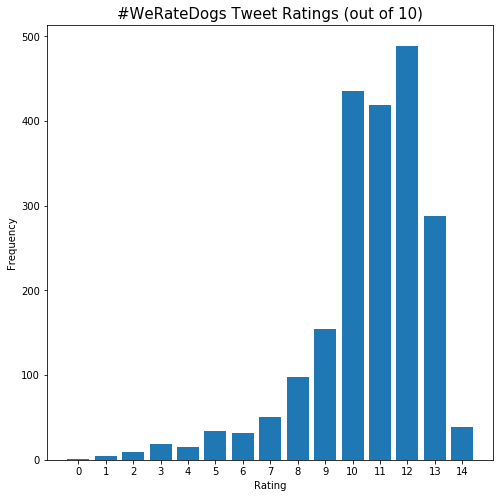

In [178]:
# Plot a bar chart of ratings without outliers
rating_plot = rating_count[rating_count.index < 15]

plt.figure(figsize=(8, 8));
plt.bar(rating_plot.index, rating_plot);
plt.title("#WeRateDogs Tweet Ratings (out of 10)", size=15);
plt.xlabel("Rating");
plt.ylabel("Frequency");
plt.xticks(ticks=[i for i in range(15)]);

As shown in the bar chart above, the distribution follows a left skew (negative skew). Here, there is a gradually increasing frequency from ratings 0-7, followed by a rapid increase peaking at rating 12, and then fall sharply, with zero frequency at rating 15.

### How does Ratings affect the Average Retweet Count, and the Average Favorite Count?

From the previous bar chart, it can be seen that there were very few observations for ratings 0 (1 row) and 1 (4 rows). These will not give a fair representation of the average count, and therefore omitted in the following plots.  

In [179]:
# Retweets average
rating_retweets = df_dogs_master_copy.groupby("rating_numerator").retweet_count.mean()
rating_retweets

rating_numerator
0.00      3443.00
1.00      3122.50
2.00      1350.33
3.00      952.58 
4.00      1105.67
5.00      1325.24
6.00      1043.62
7.00      1064.20
8.00      904.11 
9.00      817.48 
10.00     1550.92
11.00     2266.01
12.00     3136.91
13.00     6938.27
14.00     9470.41
26.00     542.00 
27.00     1885.00
75.00     7069.00
420.00    4324.00
1776.00   2772.00
Name: retweet_count, dtype: float64

In [180]:
# Favorite average
rating_favorite = df_dogs_master_copy.groupby("rating_numerator").favorite_count.mean()
rating_retweets

rating_numerator
0.00      3443.00
1.00      3122.50
2.00      1350.33
3.00      952.58 
4.00      1105.67
5.00      1325.24
6.00      1043.62
7.00      1064.20
8.00      904.11 
9.00      817.48 
10.00     1550.92
11.00     2266.01
12.00     3136.91
13.00     6938.27
14.00     9470.41
26.00     542.00 
27.00     1885.00
75.00     7069.00
420.00    4324.00
1776.00   2772.00
Name: retweet_count, dtype: float64

In [181]:
# Ratings and average retweet counts without outliers and ratings below 2
ratings_retweets_plot = rating_retweets[(rating_retweets.index < 15) & (rating_retweets.index > 1)]

# Ratings and average favorite counts without outliers and ratings below 2
ratings_favorite_plot = rating_favorite[(rating_retweets.index < 15) & (rating_retweets.index > 1)]

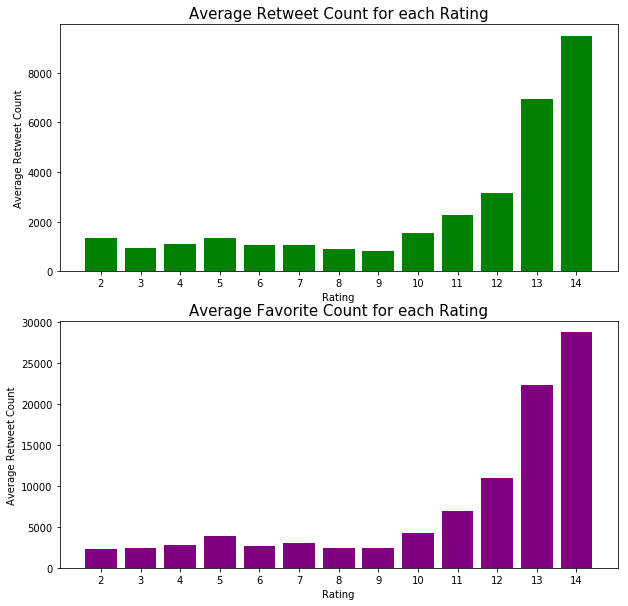

In [182]:
# Plotting both graphs side by side
plt.figure(figsize=(10, 10));

# Ratings vs. Average Retweet Count
plt.subplot(211);
plt.bar(ratings_retweets_plot.index, ratings_retweets_plot, color="green");
plt.title("Average Retweet Count for each Rating", size=15);
plt.xlabel("Rating");
plt.ylabel("Average Retweet Count");
plt.xticks(ticks=[i for i in range(2, 15)]);

# Ratings vs. Average Favorite Count
plt.subplot(212);
plt.bar(ratings_favorite_plot.index, ratings_favorite_plot, color="purple");
plt.title("Average Favorite Count for each Rating", size=15);
plt.xlabel("Rating");
plt.ylabel("Average Retweet Count");
plt.xticks(ticks=[i for i in range(2, 15)]);

The above graphs show that both average retweet counts and favorite counts follow a very similar trend with ratings. From the ratings 2-9, the count is low and does not follow any pattern. From ratings 10 onwards, the counts appear to increase exponentially up to rating 14. 

### What is the most common stages of dogs (ignoring multiple stage dogs)?

In [183]:
dog_stages = df_dogs_master_copy.dog_stage.value_counts()

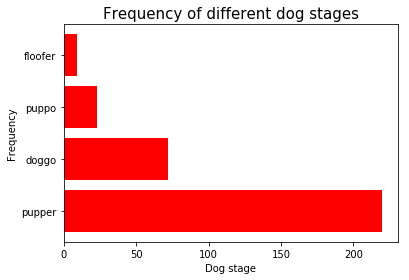

In [184]:
plt.barh(dog_stages.index, dog_stages, color="red");
plt.title("Frequency of different dog stages", size=15);
plt.xlabel("Dog stage");
plt.ylabel("Frequency");

In [185]:
# Total number of observations which contain information about dog stages
sum(dog_stages)

324

In [187]:
# Proportions of observations with information about stages of dogs
sum(dog_stages)/df_dogs_master_copy.tweet_id.count()

0.15472779369627507

As shown above, only about 15% of all tweets contain information about the stages of the dogs. With this information, it can be shown that the most common type of dog is pupper, and least common type is floofer.

### How does the number of WeRateDogs tweets vary daily and monthly?

As shown below, the dataframes contain information of tweets across nearly two years, so a time series can be plotted.

In [188]:
import datetime as dt

In [189]:
df_dogs_master_copy.timestamp.max() - df_dogs_master_copy.timestamp.min()

Timedelta('624 days 17:51:48')

In [191]:
# Create another copy of master to use for visualisation
df_dogs_master_copy2 = df_dogs_master_copy.copy()

In [193]:
# Create new column with day-month-year for grouping
df_dogs_master_copy2["day_month_year"] = df_dogs_master_copy2["timestamp"].dt.to_period("D")
df_dogs_master_copy2[["timestamp", "day_month_year"]].head()

,timestamp,day_month_year
0,2017-08-01 16:23:56+00:00,2017-08-01
1,2017-08-01 00:17:27+00:00,2017-08-01
2,2017-07-31 00:18:03+00:00,2017-07-31
3,2017-07-30 15:58:51+00:00,2017-07-30
4,2017-07-29 16:00:24+00:00,2017-07-29


In [194]:
# Groupby day and count
tweets_day = df_dogs_master_copy2.groupby("day_month_year").count()
tweets_day.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
day_month_year,,,,,,,,,,,,,,,,,,,,,
2015-11-15,3,3,3,3,3,3,3,0,3,3,...,3,3,3,3,3,3,3,3,0,0
2015-11-16,25,25,25,25,25,25,25,0,25,25,...,25,25,25,25,25,25,25,25,0,0
2015-11-17,15,15,15,15,15,15,15,7,15,15,...,15,15,15,15,15,15,15,15,0,0
2015-11-18,17,17,17,17,17,17,17,11,17,17,...,17,17,17,17,17,17,17,17,0,0
2015-11-19,23,23,23,23,23,23,23,14,23,23,...,23,23,23,23,23,23,23,23,0,0


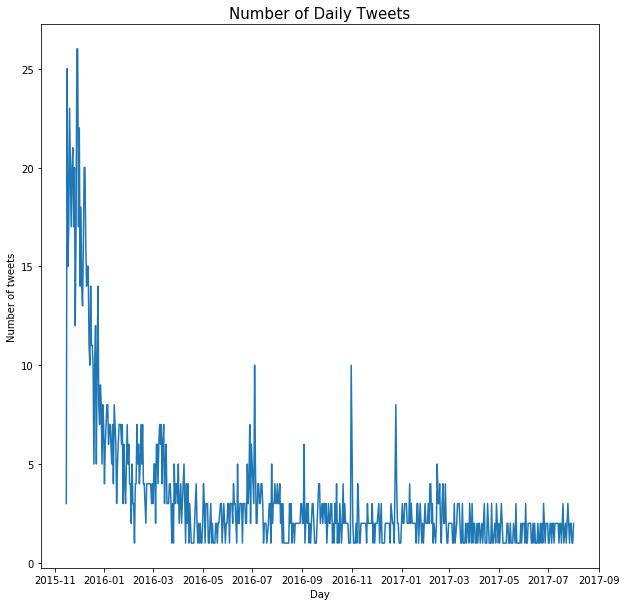

In [196]:
# Plot how the number of daily tweets changes
plt.figure(figsize=(10, 10));
#matplotlib requires dates to be in timestamp format
plt.plot(tweets_day.index.to_timestamp(), tweets_day.tweet_id); 
plt.title("Number of Daily Tweets", size=15);
plt.xlabel("Day");
plt.ylabel("Number of tweets");

As expected, the variations in the number of tweets posted daily fluctuate wildly and it is difficult to see a trend. Thus, the number of tweets posted month will be analysed.

In [202]:
# Create new column with month-year for grouping
df_dogs_master_copy2["month_year"] = df_dogs_master_copy2["timestamp"].dt.to_period("M")
tweets_month = df_dogs_master_copy2.groupby("month_year").count()
tweets_month.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage,day_month_year
month_year,,,,,,,,,,,,,,,,,,,,,
2015-11,296,296,296,296,296,296,296,177,296,296,...,295,295,295,295,295,295,295,0,0,296
2015-12,372,372,372,372,372,372,372,222,372,372,...,360,360,360,360,360,360,360,66,0,372
2016-01,183,183,183,183,183,183,183,113,183,183,...,166,166,166,166,166,166,166,46,0,183
2016-02,120,120,120,120,120,120,120,76,120,120,...,108,108,108,108,108,108,108,22,0,120
2016-03,132,132,132,132,132,132,132,91,132,132,...,118,118,118,118,118,118,118,12,0,132


In [204]:
tweets_month["tweet_id"]

month_year
2015-11    296
2015-12    372
2016-01    183
2016-02    120
2016-03    132
2016-04    60 
2016-05    59 
2016-06    90 
2016-07    96 
2016-08    61 
2016-09    69 
2016-10    71 
2016-11    54 
2016-12    57 
2017-01    69 
2017-02    67 
2017-03    52 
2017-04    42 
2017-05    43 
2017-06    48 
2017-07    51 
2017-08    2  
Freq: M, Name: tweet_id, dtype: int64

2017-08 does not contain many tweets because the data frame contains tweets from 1 August 2017 only. Thus, these tweets will be removed for further visualisations.

In [209]:
# Using Boolean indexing, tweets from August 2017 will be removed
tweets_month = tweets_month[tweets_month.index < "2017-08"]
tweets_month["tweet_id"]

month_year
2015-11    296
2015-12    372
2016-01    183
2016-02    120
2016-03    132
2016-04    60 
2016-05    59 
2016-06    90 
2016-07    96 
2016-08    61 
2016-09    69 
2016-10    71 
2016-11    54 
2016-12    57 
2017-01    69 
2017-02    67 
2017-03    52 
2017-04    42 
2017-05    43 
2017-06    48 
2017-07    51 
Freq: M, Name: tweet_id, dtype: int64

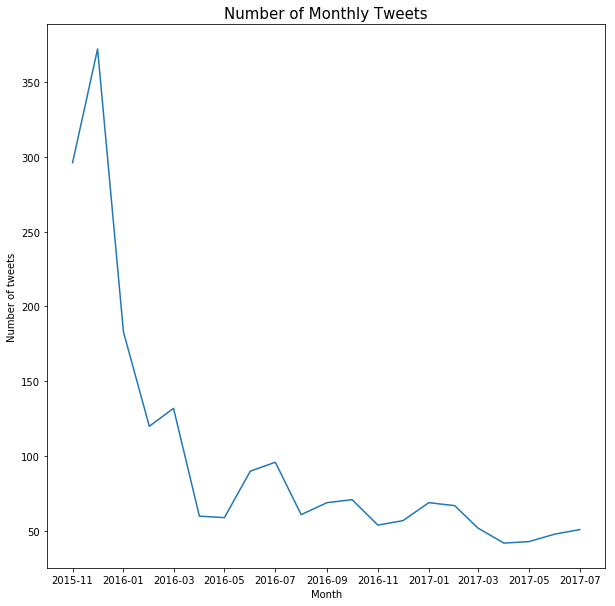

In [210]:
# Plot how the number of monthtly tweets changes
plt.figure(figsize=(10, 10));
plt.plot(tweets_month.index.to_timestamp(), tweets_month.tweet_id); 
plt.title("Number of Monthly Tweets", size=15);
plt.xlabel("Month");
plt.ylabel("Number of tweets");

As shown in the graph above, the number of tweets is highest at the end of year 2015 (over 300). Then, the monthly number of tweets have decreased exponentially until around May 2016. The number of tweets experience a slight increase in June and July 2016 (80-100 tweets). Then it drops and fluctuate between around 40 and 70 tweets ever since. This plot show that the number of #WeRateDogs tweets have fallen, as it may have lost popularity since 2016.

### Tweets from which month has the highest average WeRateDogs ***retweets*** and ***favorite counts***?

As daily number of tweets vary and would not provide a fair average number of retweets, the tweets are grouped by months. Then, the average number of retweets and favorites are calculated and visualised.

In [211]:
# Minimum number of tweets in a month
tweets_month.tweet_id.min()

42

The minimum number of tweets is 42, which is sufficient to calculate the average retweets and favourite counts. 

In [212]:
# Group by month and find mean retweet counts
retweets_mean = df_dogs_master_copy2.groupby("month_year").retweet_count.mean()
retweets_mean

month_year
2015-11   543.76 
2015-12   1563.53
2016-01   1664.22
2016-02   1552.48
2016-03   1768.30
2016-04   1627.90
2016-05   2247.68
2016-06   4131.99
2016-07   2830.53
2016-08   3616.89
2016-09   3616.35
2016-10   4678.69
2016-11   4810.87
2016-12   5618.82
2017-01   6193.09
2017-02   4334.67
2017-03   4961.27
2017-04   5762.55
2017-05   7514.16
2017-06   6547.42
2017-07   7093.24
2017-08   7683.50
Freq: M, Name: retweet_count, dtype: float64

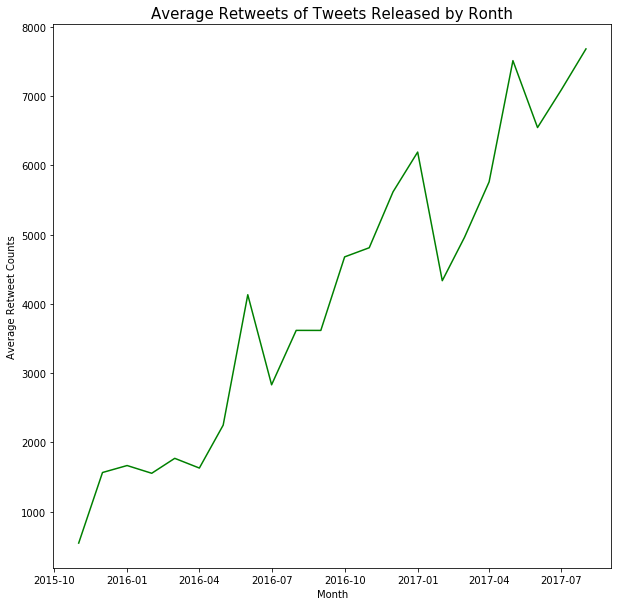

In [213]:
# Plotting average retweets 
plt.figure(figsize=(10, 10));
plt.plot(retweets_mean.index.to_timestamp(), retweets_mean, color="green");
plt.title("Average Retweets of Tweets Released by Ronth", size=15);
plt.xlabel("Month");
plt.ylabel("Average Retweet Counts");

In [214]:
# Group by month and find mean favourite counts
favorite_mean = df_dogs_master_copy2.groupby("month_year").favorite_count.mean()
favorite_mean

month_year
2015-11   1241.79 
2015-12   3583.07 
2016-01   4179.50 
2016-02   4128.88 
2016-03   4692.21 
2016-04   4668.38 
2016-05   6215.95 
2016-06   9396.94 
2016-07   7446.79 
2016-08   10154.11
2016-09   11103.75
2016-10   13917.96
2016-11   14593.61
2016-12   16404.93
2017-01   19075.46
2017-02   18304.00
2017-03   20662.69
2017-04   22972.52
2017-05   28849.60
2017-06   28871.02
2017-07   32420.96
2017-08   36643.00
Freq: M, Name: favorite_count, dtype: float64

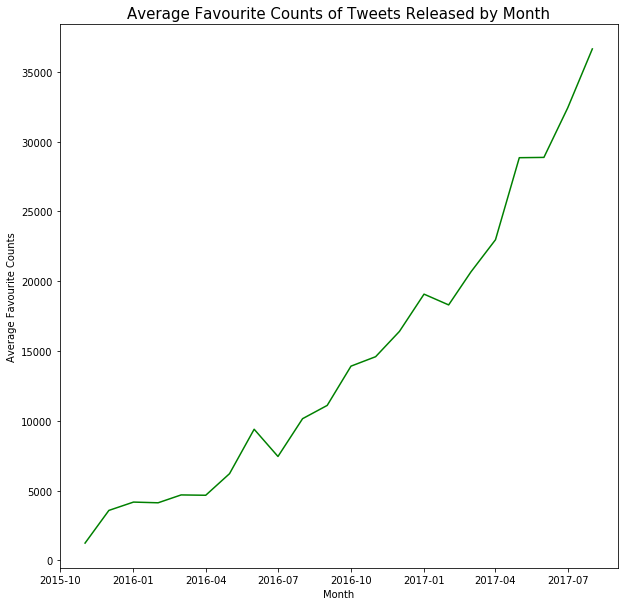

In [215]:
# Plotting average favourite counts 
plt.figure(figsize=(10, 10));
plt.plot(favorite_mean.index.to_timestamp(), favorite_mean, color="green");
plt.title("Average Favourite Counts of Tweets Released by Month", size=15);
plt.xlabel("Month");
plt.ylabel("Average Favourite Counts");

From both plots above, there appears to be clear trend that as tweets are released more recently, the average retweet and favourite counts increase. The months and year with the highest average retweet counts and favourite counts are May 2017 and July 2017, respectively. 

### Is there a correlation between the number of monthly tweets and its corresponding average retweet counts?

Below, the number of monthly tweets are compared with the average retweet counts for those tweets released in that month. It will be interesting to see if the number of monthly tweets affect the retweet counts. 

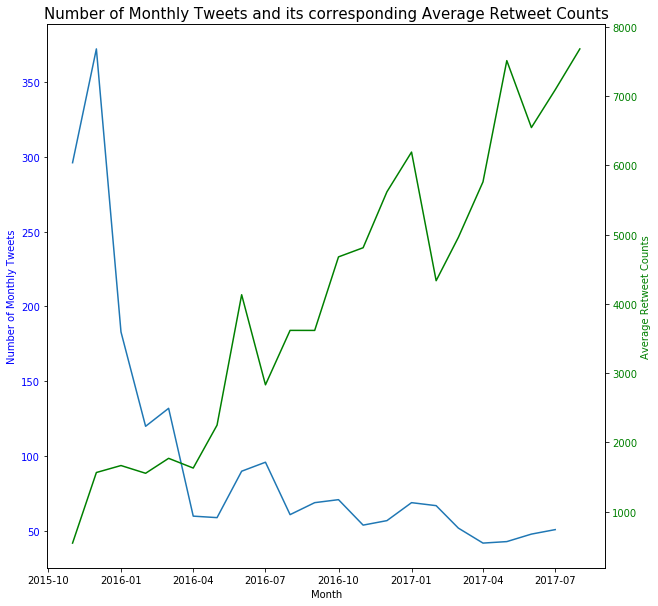

In [216]:
# Plotting both graphs with different axes require creating an axis object
fig, ax1 = plt.subplots(figsize=(10, 10));
plt.title("Number of Monthly Tweets and its corresponding Average Retweet Counts", size=15)
ax1.set_xlabel("Month");

# First axes object for monthly tweets
ax1.set_ylabel("Number of Monthly Tweets", color="blue");
ax1.plot(tweets_month.index.to_timestamp(), tweets_month.tweet_id);
ax1.tick_params(axis="y", labelcolor="blue");

# create a second axes that shares the same x-axis for average retweet counts
ax2 = ax1.twinx()
ax2.set_ylabel("Average Retweet Counts", color="green");
ax2.plot(retweets_mean.index.to_timestamp(), retweets_mean, color="green");
ax2.tick_params(axis="y", labelcolor="green");

As shown by the plot above, there appears to be an inverse relationship between the number monthly tweets and the corresponding retweet counts. As the number of monthly retweets decrease, the corresponding average retweet counts increases. This does not indicate that the WeRateDogs tweets lose popularity. Rather - with the number of monthly tweets decreasing, the quality of these tweets may have increased, evident by an increase in retweet counts. That being said, both monthly tweets and retweet counts may not influence each other directly. Further analysis may be required to establish whether one truly affects the other. 

### How many images are most commonly posted in each tweet?

In [217]:
img_count = df_dogs_master_copy2.groupby("img_num").count()
img_count

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage,day_month_year,month_year
img_num,,,,,,,,,,,,,,,,,,,,,
1.00,1692,1692,1692,1692,1692,1691,1691,1174,1692,1692,...,1692,1692,1692,1692,1692,1692,240,9,1692,1692
2.00,190,190,190,190,190,190,190,136,190,190,...,190,190,190,190,190,190,33,1,190,190
3.00,59,59,59,59,59,59,59,38,59,59,...,59,59,59,59,59,59,13,0,59,59
4.00,30,30,30,30,30,30,30,24,30,30,...,30,30,30,30,30,30,7,0,30,30


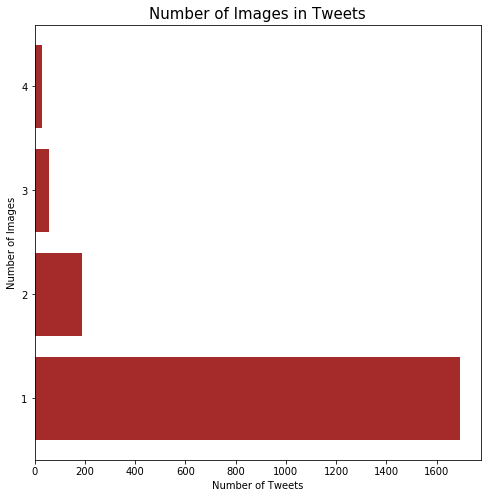

In [218]:
plt.figure(figsize=(8,8));
plt.barh(img_count.index, img_count.tweet_id, color="brown");
plt.title("Number of Images in Tweets", size=15);
plt.xlabel("Number of Tweets");
plt.ylabel("Number of Images");
plt.yticks([tick for tick in range(1, 5)]);

The most common number of images posted is one. This is as expected since one image per tweet tend to give the image more credit and recognition. 

### Lastly, what is the index of the picture with the highest number favourite counts?

In [248]:
fav_max = df_dogs_master_copy.favorite_count.max()
fav_max_row = df_dogs_master_copy[df_dogs_master_copy.favorite_count == fav_max]
fav_max_row

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,multiple_dog_stage
413,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.00,10.00,NaN,48265.00,132810.00,...,0.20,True,Labrador_retriever,0.16,True,Irish_terrier,0.07,True,puppo,NaN
